In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [53]:
#opening merged and interpolated hist hammoz
#need to make sure they have the same year range
model = xr.open_dataset('E://faks//cda//cmip6//ham_hist_interpo.nc')
time_slice = slice('1981-01-01T00:00:00.000000000','2014-12-31T23:30:00.000000000')
modelsel = model.sel(time=time_slice)

In [50]:
model

<xarray.Dataset>
Dimensions:  (time: 1446360)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T00:30:00 ... 2014-12-31T23:30:00
    height   float64 ...
    lat      int32 ...
    lon      int32 ...
Data variables:
    tas      (time) float32 ...

In [26]:
#opening merged era
era5 = xr.open_dataset('E://faks//cda//era5//ERA5.hourly.1981-2021.nc')

In [30]:
#need to interpolate era5 first and save it
era5_int= era5.t2m.interp(latitude=56, longitude=14)
era5_int.to_netcdf('E://faks//cda//era5//ERA5.1981-2014.nc')

In [32]:
eraint = xr.open_dataset('E://faks//cda//era5//ERA5.1981-2014.nc')

In [52]:
eraint

<xarray.Dataset>
Dimensions:    (time: 268872)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 ... 2021-12-31T23:00:00
    latitude   int32 ...
    longitude  int32 ...
Data variables:
    t2m        (time) float64 ...

In [54]:
#need to make sure they have the same year range
time_slice = slice('1981-01-01T00:00:00.000000000','2014-12-31T23:30:00.000000000')
erasel = eraint.sel(time=time_slice)

In [85]:
#dropping everything except time
#choosing the winter months
#converting from kelvin
model_ham = modelsel.tas.drop_vars(['lat', 'lon','height']).sel(time=modelsel.time.dt.month.isin([1, 2, 3, 12])) - 273.15
era = erasel.t2m.drop_vars(['latitude', 'longitude']).sel(time=erasel.time.dt.month.isin([1, 2, 3, 12])) - 273.15

In [94]:
model_daily = model_ham.groupby('time.dayofyear').mean(dim='time', skipna=True)

In [95]:
model_daily

<xarray.DataArray 'tas' (dayofyear: 123)>
array([ 0.37808365,  0.5600368 , -0.44774354, -0.63973635, -0.09824342,
        0.3804695 ,  0.401572  ,  0.56987834,  0.14120588,  0.02869296,
       -0.02512633,  0.0870288 , -0.14219879, -0.21259959, -0.03183814,
        0.29236785,  0.4469397 ,  0.67255074,  0.43976316,  0.73669416,
        0.56309056,  0.39823434,  0.57039386,  0.31649542,  0.79888046,
        0.7191564 ,  1.3323342 ,  1.5279106 ,  1.0095596 ,  0.44903824,
        0.74690247,  1.016794  ,  0.39071175,  0.6380691 ,  1.0643394 ,
        1.0825442 ,  0.56593025,  0.6881162 ,  1.2333509 ,  1.5646281 ,
        0.82064193,  0.4616454 ,  0.19463871,  0.26278555,  0.29241073,
       -0.0238818 ,  0.4812043 ,  0.67187274, -0.04880636, -0.5823789 ,
       -0.49332088, -0.3700991 , -0.5702892 , -0.27265134, -0.3891954 ,
        0.03266518,  0.10480555,  0.4648407 ,  0.8695757 ,  0.52485394,
        0.12028489, -0.08095258, -0.29718998, -0.18414715, -0.03039207,
       -0.16908354, -0.04039937,  0.22585881,  0.401409  ,  0.5621547 ,
        0.66089636,  0.9054242 ,  0.9460437 ,  1.2344509 ,  0.98925596,
        0.8188165 ,  1.1947678 ,  1.4893008 ,  1.8714164 ,  1.798992  ,
        1.9674443 ,  2.2033908 ,  2.2458594 ,  1.914468  ,  1.4455107 ,
        1.2649453 ,  1.6678833 ,  1.8400918 ,  2.016035  ,  1.7866244 ,
        1.4761705 ,  2.1722386 ,  2.0328684 ,  1.2049432 ,  0.8724568 ,
        1.0078303 ,  1.391181  ,  2.010993  ,  2.013087  ,  2.0345876 ,
        2.2275493 ,  2.030554  ,  1.2089539 ,  1.4145467 ,  1.246157  ,
        1.0964329 ,  1.3577462 ,  0.9818747 ,  1.5099863 ,  0.8234077 ,
        1.3363239 ,  0.9941734 ,  0.35189995,  0.565887  ,  0.9896314 ,
        0.52590567,  0.8580961 ,  1.5056254 ,  1.7010012 ,  1.639315  ,
        1.6133522 ,  0.7298871 ,  1.4288139 ], dtype=float32)
Coordinates:
    height     float64 ...
    lat        int32 ...
    lon        int32 ...
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

In [96]:
era_daily = era.groupby('time.dayofyear').mean(dim='time', skipna=True)

In [97]:
era_daily

<xarray.DataArray 't2m' (dayofyear: 123)>
array([ 0.31002656, -0.04589833, -0.90398251, -1.25368889, -1.30337113,
       -0.28064703, -0.47478321, -0.24909764, -0.34878981, -0.07315119,
        0.50246859,  0.79491541,  0.42526481,  0.78587998,  0.41588399,
        0.53336403,  0.42566968,  0.19459414,  0.23729017, -0.18117297,
       -0.358029  , -0.71073196, -0.58019799, -0.49374818, -0.80442775,
       -0.83539148, -1.18703473, -0.89590399, -1.26040285, -0.60627375,
       -0.4485576 ,  0.0076289 , -0.15434698, -0.45542678,  0.17132909,
        0.4870464 ,  0.2355582 ,  0.34686075,  0.4001569 , -0.5345007 ,
       -0.51984712, -0.91669823, -0.70362967, -1.03945057, -0.8369675 ,
       -1.05858597, -1.12412072, -1.3045791 , -0.94924044, -1.00201732,
       -0.90471743, -0.78646022, -0.89270853, -0.62778196, -0.18120072,
        0.24137523,  0.07119428,  0.165739  ,  0.59937455,  0.58023756,
        0.34255627, -0.13956099,  0.07430662,  0.27892658,  0.6982702 ,
        1.10415331,  1.66144654,  1.56270156,  1.66944171,  1.89590576,
        1.4617864 ,  1.1806075 ,  1.75684281,  1.88516639,  1.86096422,
        2.65997654,  2.61405636,  2.17313759,  2.02839764,  2.27766537,
        2.7208905 ,  2.5708084 ,  2.3291889 ,  2.36546019,  2.64368198,
        2.86260488,  3.23566004,  3.239369  ,  3.7533499 ,  4.52500749,
        3.25484242,  1.31985141,  1.46010699,  2.64869215,  2.75299299,
        2.7630651 ,  2.66915829,  1.59417265,  1.46802123,  1.57847432,
        1.70580335,  1.69684041,  0.97196159,  0.58261226,  0.56904796,
        0.81422579,  0.29454979,  0.34196054,  0.78033142,  1.1435294 ,
       -0.03484164, -0.64551928, -0.25322746,  0.77182388,  0.70242269,
        0.49737168,  0.55101954,  0.0070252 ,  0.54265067,  0.42313452,
        0.22647321, -0.14444973, -0.75855018])
Coordinates:
    latitude   int32 ...
    longitude  int32 ...
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

## Bias

Text(0.5, 1.0, '')

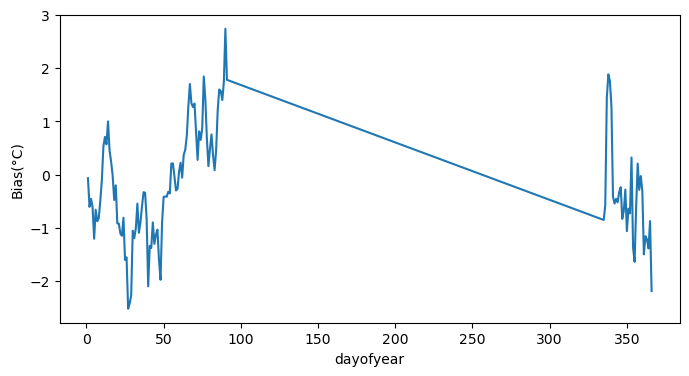

In [98]:
#i decided to calculate daily bias instead of monthly since we have just four months
#it does look a bit weird tho
#maybe we can plot it out for each month?
bias = era_daily-model_daily
plt.figure(figsize=(8, 4))
bias.plot()
plt.ylabel('Bias(°C)')
plt.title('')